# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Tag the commit as *Final submission of Assignment 3*
- Submit through GitHub
- Provide your GitHub url to the Ipython notebook as the submisison for Brightspace assignment 3
- Post (interesting) errors in the course Github's issue page

# Assignment Intro

In this assignment, you will be asked to make some visualisations on the dataset that you worked with in the previous assignments.

### DEADLINE FOR THIS ASSIGNMENT IS 15 OCTOBER 2021 BEFORE 23:59

<hr />

## Import libraries
Update this list as you go along the assigment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import geopandas as gpd
import math

## Activities changes

Use the dataset that you have been working on in the previous assignments. Pick either a city or a province, then recreate the diagram for one of the activities, similar to those that are shown in [Google mobility reports](https://www.gstatic.com/covid19/mobility/2021-09-28_AW_Mobility_Report_en.pdf) or as below.

<img src="Images/Transit_changes.png" alt="drawing" width="600"/>

### Remarks:
- Create readable graphs by providing appropriate ticks, labels, titles, colorbars, legends
- [Hint] A possible [function](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_between.html#matplotlib.axes.Axes.fill_between) to fill areas between lines
- [Optional] If you are ambitous, you can use subplots to also include the left part of the figure, which shows the percentages as below
 <img src="Images/Transit_changes_text.png" alt="drawing" width="200"/>

D:\Anaconda3\envs\tf2\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


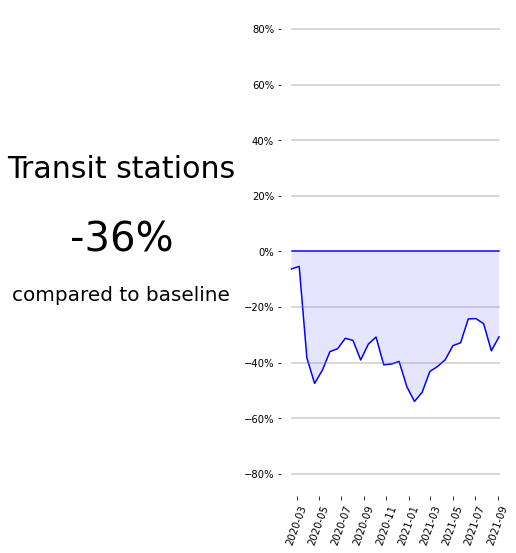

In [2]:
#Getting data ready
df_2020 = pd.read_csv(r'C:\Users\loran\Desktop\Mechanical engineering - Delft\Master\2nd - Q1\Programming\Assignments\2020_NL_Region_Mobility_Report.csv')
df_2021 = pd.read_csv(r'C:\Users\loran\Desktop\Mechanical engineering - Delft\Master\2nd - Q1\Programming\Assignments\2021_NL_Region_Mobility_Report.csv')
df = pd.concat([df_2020,df_2021])
df_province_selected = df.loc[df.sub_region_1.str.contains("South Holland", na=False)]

#Removing noise by sampling every 3 weeks
df_province_selected.iloc[:,8] = pd.to_datetime(df_province_selected.iloc[:,8])
df_province_agg = df_province_selected.resample('3W', on='date').mean()
df_province_agg.reset_index(inplace=True)

#average text for left subplot
average = str(math.floor(df_province_agg['transit_stations_percent_change_from_baseline'].mean()))
y = df_province_agg['transit_stations_percent_change_from_baseline']
x = df_province_agg['date']

#plotting
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (9,9))

#figure 1
#adding text inside the plot
ax1.text(.5, .65, 'Transit stations', fontsize = 30, horizontalalignment = 'center')
ax1.text(.5, .40, 'compared to baseline', fontsize = 20, horizontalalignment = 'center')
ax1.text(.5, .5, average + '%', fontsize = 40, horizontalalignment = 'center')
ax1.axis('off')

#figure 2
ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.spines['left'].set_color('none')
ax2.spines['bottom'].set_color('none')

#Some general data
ax2.fill_between(x, y, y2=0,interpolate=False,facecolor='blue', alpha=0.1)
plt.plot(x, y,'blue', alpha=1)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.plot(x, np.zeros(len(x)),'blue', alpha=1)
degrees = 70
plt.xticks(rotation=degrees)

#Make the lines in plot
lines1 = [20,40,60,80]
lines2 = [-20,-40,-60,-80]
for i in lines1:
    plt.plot(x, np.full((len(x),1), i),'gray', alpha=0.4)
for i in lines2:
    plt.plot(x, np.full((len(x),1), i),'gray', alpha=0.4)
plt.show()


## Multiple lines in the same plot

In the previous question, you created a figure for a single city/province. Now, include multiple cities or provinces in a single figure. This time, make the diagram interactive, such as being be to select/deselect particular cities/provinces.


### Remarks

- You donot need to fill areas between the lines for the multiple lines plot here
- [Hint] If you are to use plotly express, you can use `color` argument in [px.line](https://plotly.com/python-api-reference/generated/plotly.express.line)


In [13]:
#Collecting data for different provinces
a = df.loc[df.sub_region_1.str.contains("South Holland", na=False)]
b = df.loc[df.sub_region_1.str.contains("North Holland", na=False)]
c = df.loc[df.sub_region_1.str.contains("Brabant", na=False)]
d = df.loc[df.sub_region_1.str.contains("Utrecht", na=False)]

#Removing noise by sampling per 3 weeks
a.iloc[:,8] = pd.to_datetime(a.iloc[:,8])
a_new = a.resample('3W', on='date').mean()
a_new.reset_index(inplace=True)

b.iloc[:,8] = pd.to_datetime(b.iloc[:,8])
b_new = b.resample('3W', on='date').mean()
b_new.reset_index(inplace=True)

c.iloc[:,8] = pd.to_datetime(c.iloc[:,8])
c_new = c.resample('3W', on='date').mean()
c_new.reset_index(inplace=True)

d.iloc[:,8] = pd.to_datetime(d.iloc[:,8])
d_new = d.resample('3W', on='date').mean()
d_new.reset_index(inplace=True)

#Plotting the figure
fig = go.Figure()

fig.add_trace(go.Scatter(x=a_new.iloc[:,0], y=a_new.iloc[:,6],
                         line_shape='spline', name="South Holland"))
fig.add_trace(go.Scatter(x=b_new.iloc[:,0], y=b_new.iloc[:,6],
                         line_shape='spline',name="North Holland"))
fig.add_trace(go.Scatter(x=c_new.iloc[:,0], y=c_new.iloc[:,6],
                         line_shape='spline',name="Brabant"))
fig.add_trace(go.Scatter(x=d_new.iloc[:,0], y=d_new.iloc[:,6],
                         line_shape='spline',name="Utrecht"))
fig.update_traces(mode='lines')
fig.update_layout(yaxis_title='Transit stations percent change from baseline')


D:\Anaconda3\envs\tf2\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Geospatial choropleth

Visualise the percentage changes from the baseline at either city-level or province-level in a geographical map for a chosen day.

[Hint] Here is an example of municipal boundaries of Netherlands. You can download the municipal boundaries of Netherlands from this [link](https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json) and here is some [code](https://www.cbs.nl/en-gb/onze-diensten/open-data/statline-as-open-data/cartography) to read this file as well.

If you cannot find the boundary of your selected country. Feel free to use Netherlands data for this question.

DO NOT forget to label the appropriate axes for the visualisations

[Optional] Plot and animate for multiple days

Text(0.5, 1.0, 'Transit stations percent change from baseline')

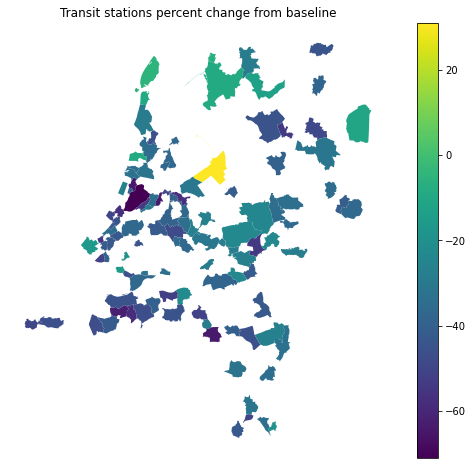

In [5]:
#Data for one day
df_day = df.loc[df.date.str.contains("2020-11-29")]

# Retrieve data with municipal boundaries from PDOK
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json'
municipal_boundaries = gpd.read_file(geodata_url)

# Link data from Statistics Netherlands to geodata
municipal_boundaries = pd.merge(municipal_boundaries, df_day,
                               left_on = "statnaam", 
                               right_on = "sub_region_2")

# code for removing NaN
# find_indexes = municipal_boundaries.iloc[:, 15:21].dropna().index.values
# municipal_boundaries = municipal_boundaries.iloc[find_indexes,:]

# Create a thematic map
p = municipal_boundaries.plot(column = 'transit_stations_percent_change_from_baseline', figsize = (10,8),legend=True)
p.axis('off')
p.set_title('Transit stations percent change from baseline')

#Some areas are white. My idea was to remove all provinces with NaN values. The code is written above.However, this did not
# solve my problem. What I think is that some provinces do not exsist in the Dataframe, thus geopandas cannot find a correlation.
